In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv(r"D:\\DataScience\\seaborn-data-master\\car_crashes.csv")
dataset.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35


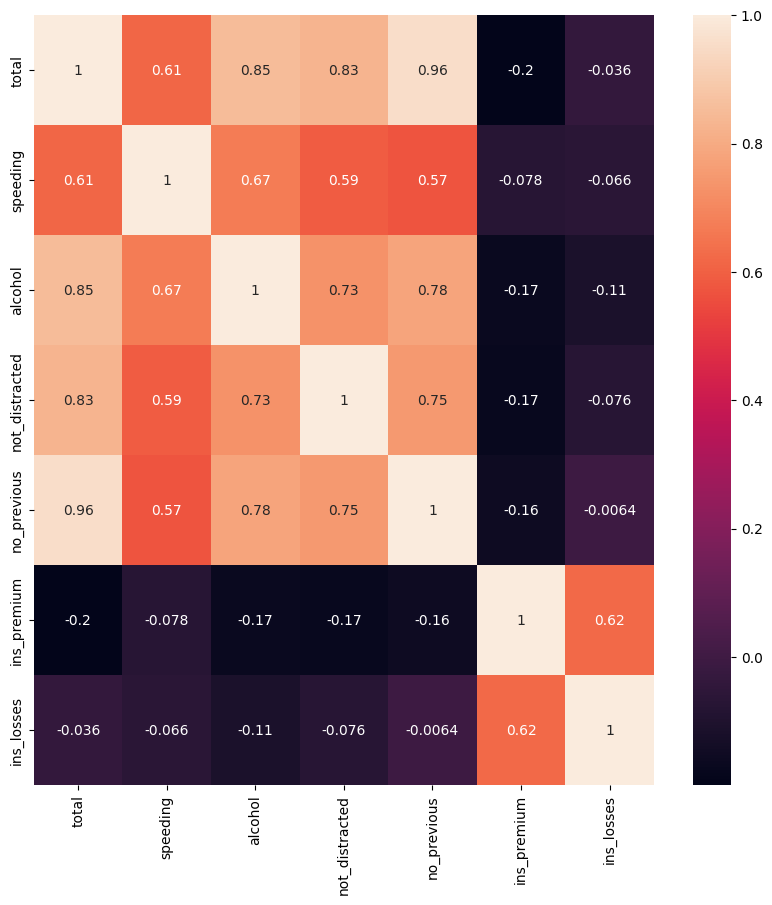

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [4]:
x= dataset.iloc[:,:-1]
y= dataset["ins_losses"]

In [5]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [8]:
#LinearRegression

In [9]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

21.881917304948683

In [22]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

382.1321477280624
18.36058538954851
19.548200626350816


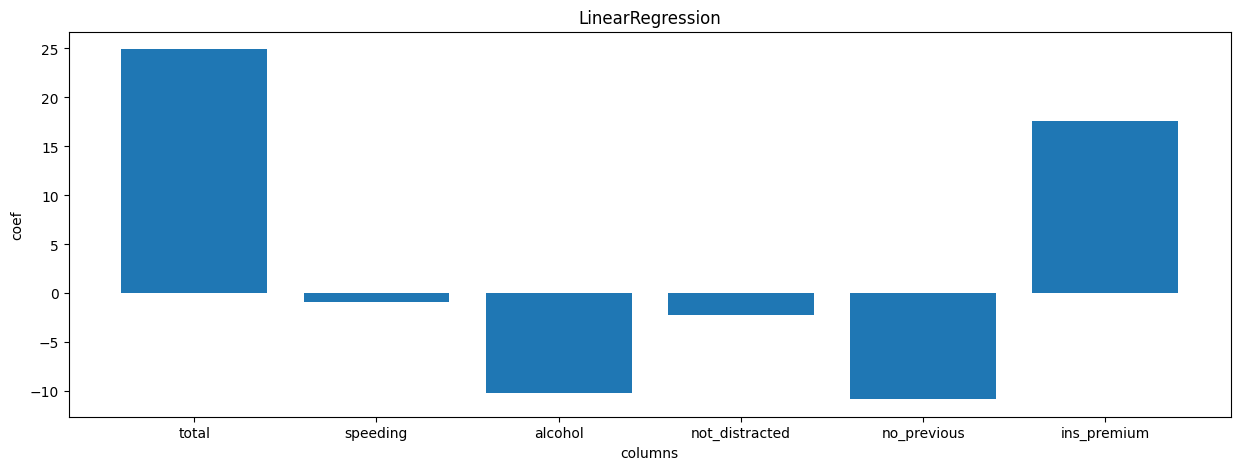

In [10]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()


In [11]:
#Lasso -feacher selection

In [12]:
la=Lasso(alpha=0.1)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

28.399876285499392

In [23]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

350.2480873656972
17.37934969706124
18.714916173087637


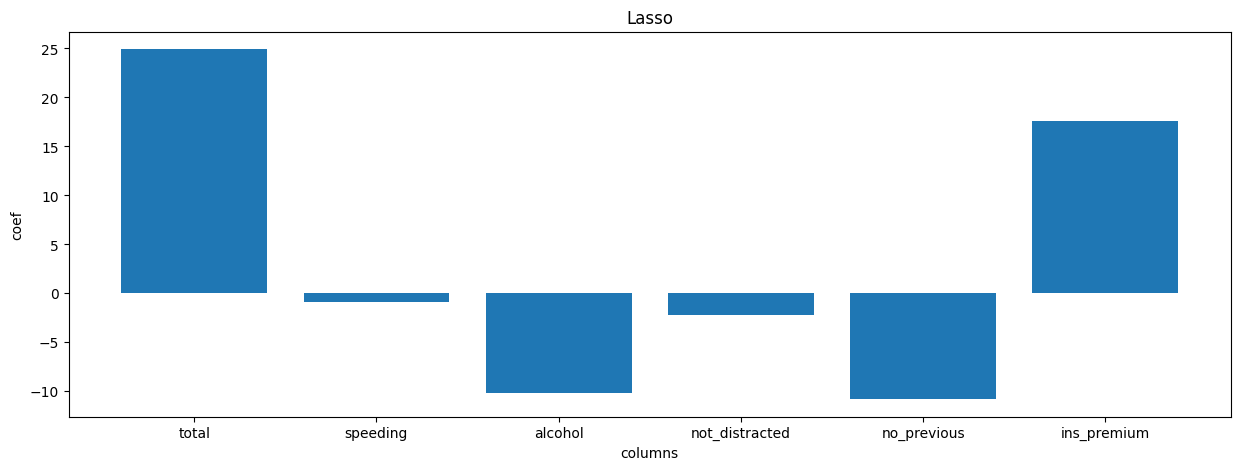

In [13]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [14]:
#Ridge

In [16]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

35.91846450407845

In [24]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

313.4692243326119
14.48791283919829
17.7050621103856


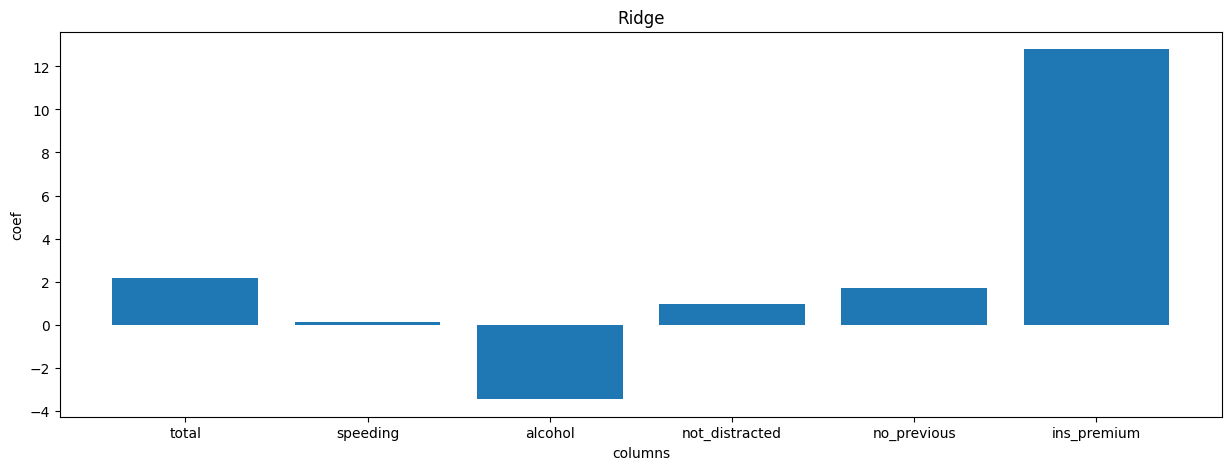

In [17]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [25]:
df= pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,total,24.939364,16.591415,2.165365
1,speeding,-0.888814,-0.444720,0.115992
2,alcohol,-10.183566,-8.827210,-3.439916
3,not_distracted,-2.226712,-0.222514,0.970385
4,no_previous,-10.812617,-5.709958,1.736071
5,ins_premium,17.630357,16.956971,12.797740
